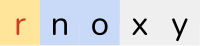
<div style="clear:both"></div>
Rafał Nowak<br/>
<a href="https://github.com/rnoxy">github.com/rnoxy</a>

> `!pip install torch`<br/>
> `!pip install torchvision`

In [1]:
import torch
import torchvision

In [3]:
from torchvision.datasets import MNIST

In [4]:
dataset_train = MNIST(root='datasets/', download=True, train=True)
dataset_test  = MNIST(root='datasets/', download=False, train=False)

In [6]:
len(dataset_train), len(dataset_test)

(60000, 10000)

In [12]:
X_train = dataset_train.data / 255
X_test = dataset_test.data / 255

X_train = torch.flatten( X_train, start_dim=1 )
X_test = torch.flatten( X_test, start_dim=1 )

In [13]:
X_train.shape, X_test.shape

(torch.Size([60000, 784]), torch.Size([10000, 784]))

In [ ]:
# Model

In [31]:
W1 = torch.randn( 784, 100, requires_grad=True )
b1 = torch.randn( 100, requires_grad=True )

W2 = torch.randn( 100, 10, requires_grad=True )
b2 = torch.randn( 10, requires_grad=True )

In [ ]:
y_train = dataset_train.targets

In [35]:
# Cross entropy losss
loss = torch.nn.functional.cross_entropy( Z2, y_train )

In [77]:

W1 = torch.randn( 784, 100, requires_grad=True )
b1 = torch.randn( 100, requires_grad=True )

W2 = torch.randn( 100, 10, requires_grad=True )
b2 = torch.randn( 10, requires_grad=True )

nr_epochs = 5
alpha = torch.tensor(0.1)
batch_size = 32

for epoch in range(nr_epochs):

    for batch_nr in range(len(X_train) // batch_size):
        
        x_batch = X_train[ batch_nr*batch_size :  (batch_nr+1)*batch_size ]
        y_batch = y_train[ batch_nr*batch_size :  (batch_nr+1)*batch_size ]
    
        # Forward propagation
        Z1 = torch.matmul( x_batch , W1 ) + b1
        A1 = torch.tanh( Z1 )

        Z2 = torch.matmul( A1, W2 ) + b2 # logits
        A2 = torch.softmax( Z2, dim=1 )

        loss = torch.nn.functional.cross_entropy( Z2, y_batch )

        with torch.no_grad():
            acc_train = torch.sum( torch.argmax( A2, dim=1 ) == y_batch ) / len(y_batch) 
        print(f"Epoch {epoch:2d},  step={batch_nr:4d},  loss={loss.item():.3f},  accuracy={acc_train:.3f}")

        # Backward propagation
        loss.backward()

        with torch.no_grad():
            W1 -= alpha * W1.grad
            W2 -= alpha * W2.grad
            b1 -= alpha * b1.grad
            b2 -= alpha * b2.grad

        W1.grad.zero_()
        W2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()

Epoch  0,  step=   0,  loss=19.017,  accuracy=0.062
Epoch  0,  step=   1,  loss=14.729,  accuracy=0.125
Epoch  0,  step=   2,  loss=15.514,  accuracy=0.094
Epoch  0,  step=   3,  loss=15.559,  accuracy=0.062
Epoch  0,  step=   4,  loss=9.644,  accuracy=0.094
Epoch  0,  step=   5,  loss=11.971,  accuracy=0.156
Epoch  0,  step=   6,  loss=11.573,  accuracy=0.094
Epoch  0,  step=   7,  loss=11.651,  accuracy=0.062
Epoch  0,  step=   8,  loss=9.478,  accuracy=0.344
Epoch  0,  step=   9,  loss=10.129,  accuracy=0.250
Epoch  0,  step=  10,  loss=9.583,  accuracy=0.188
Epoch  0,  step=  11,  loss=7.953,  accuracy=0.281
Epoch  0,  step=  12,  loss=9.822,  accuracy=0.219
Epoch  0,  step=  13,  loss=11.110,  accuracy=0.219
Epoch  0,  step=  14,  loss=7.975,  accuracy=0.219
Epoch  0,  step=  15,  loss=10.232,  accuracy=0.125
Epoch  0,  step=  16,  loss=9.602,  accuracy=0.156
Epoch  0,  step=  17,  loss=7.410,  accuracy=0.312
Epoch  0,  step=  18,  loss=7.978,  accuracy=0.219
Epoch  0,  step=  19,

Epoch  0,  step= 617,  loss=0.186,  accuracy=0.969
Epoch  0,  step= 618,  loss=0.734,  accuracy=0.875
Epoch  0,  step= 619,  loss=2.576,  accuracy=0.688
Epoch  0,  step= 620,  loss=1.358,  accuracy=0.812
Epoch  0,  step= 621,  loss=0.287,  accuracy=0.906
Epoch  0,  step= 622,  loss=1.841,  accuracy=0.688
Epoch  0,  step= 623,  loss=1.433,  accuracy=0.812
Epoch  0,  step= 624,  loss=0.930,  accuracy=0.781
Epoch  0,  step= 625,  loss=1.465,  accuracy=0.750
Epoch  0,  step= 626,  loss=1.952,  accuracy=0.594
Epoch  0,  step= 627,  loss=1.643,  accuracy=0.688
Epoch  0,  step= 628,  loss=1.003,  accuracy=0.688
Epoch  0,  step= 629,  loss=0.956,  accuracy=0.781
Epoch  0,  step= 630,  loss=1.742,  accuracy=0.719
Epoch  0,  step= 631,  loss=1.046,  accuracy=0.750
Epoch  0,  step= 632,  loss=0.856,  accuracy=0.875
Epoch  0,  step= 633,  loss=1.023,  accuracy=0.719
Epoch  0,  step= 634,  loss=0.832,  accuracy=0.812
Epoch  0,  step= 635,  loss=1.147,  accuracy=0.812
Epoch  0,  step= 636,  loss=0.7

Epoch  0,  step=1290,  loss=1.260,  accuracy=0.781
Epoch  0,  step=1291,  loss=1.261,  accuracy=0.781
Epoch  0,  step=1292,  loss=0.955,  accuracy=0.688
Epoch  0,  step=1293,  loss=0.849,  accuracy=0.719
Epoch  0,  step=1294,  loss=1.742,  accuracy=0.688
Epoch  0,  step=1295,  loss=1.330,  accuracy=0.781
Epoch  0,  step=1296,  loss=0.865,  accuracy=0.719
Epoch  0,  step=1297,  loss=0.923,  accuracy=0.781
Epoch  0,  step=1298,  loss=0.860,  accuracy=0.781
Epoch  0,  step=1299,  loss=1.147,  accuracy=0.750
Epoch  0,  step=1300,  loss=0.905,  accuracy=0.812
Epoch  0,  step=1301,  loss=0.164,  accuracy=0.906
Epoch  0,  step=1302,  loss=0.506,  accuracy=0.750
Epoch  0,  step=1303,  loss=0.736,  accuracy=0.781
Epoch  0,  step=1304,  loss=0.894,  accuracy=0.719
Epoch  0,  step=1305,  loss=1.202,  accuracy=0.750
Epoch  0,  step=1306,  loss=1.073,  accuracy=0.781
Epoch  0,  step=1307,  loss=0.619,  accuracy=0.875
Epoch  0,  step=1308,  loss=1.192,  accuracy=0.781
Epoch  0,  step=1309,  loss=1.2

Epoch  1,  step= 111,  loss=0.369,  accuracy=0.875
Epoch  1,  step= 112,  loss=0.292,  accuracy=0.938
Epoch  1,  step= 113,  loss=0.438,  accuracy=0.875
Epoch  1,  step= 114,  loss=1.112,  accuracy=0.844
Epoch  1,  step= 115,  loss=0.945,  accuracy=0.844
Epoch  1,  step= 116,  loss=0.947,  accuracy=0.812
Epoch  1,  step= 117,  loss=0.184,  accuracy=0.938
Epoch  1,  step= 118,  loss=0.835,  accuracy=0.781
Epoch  1,  step= 119,  loss=0.790,  accuracy=0.844
Epoch  1,  step= 120,  loss=0.190,  accuracy=0.969
Epoch  1,  step= 121,  loss=0.513,  accuracy=0.938
Epoch  1,  step= 122,  loss=0.136,  accuracy=0.938
Epoch  1,  step= 123,  loss=0.214,  accuracy=0.906
Epoch  1,  step= 124,  loss=0.932,  accuracy=0.844
Epoch  1,  step= 125,  loss=0.631,  accuracy=0.844
Epoch  1,  step= 126,  loss=0.451,  accuracy=0.938
Epoch  1,  step= 127,  loss=0.609,  accuracy=0.906
Epoch  1,  step= 128,  loss=0.359,  accuracy=0.875
Epoch  1,  step= 129,  loss=0.925,  accuracy=0.719
Epoch  1,  step= 130,  loss=0.8

Epoch  1,  step= 808,  loss=0.098,  accuracy=0.969
Epoch  1,  step= 809,  loss=0.509,  accuracy=0.844
Epoch  1,  step= 810,  loss=0.576,  accuracy=0.688
Epoch  1,  step= 811,  loss=0.611,  accuracy=0.875
Epoch  1,  step= 812,  loss=0.108,  accuracy=0.938
Epoch  1,  step= 813,  loss=0.238,  accuracy=0.906
Epoch  1,  step= 814,  loss=0.791,  accuracy=0.812
Epoch  1,  step= 815,  loss=0.073,  accuracy=0.969
Epoch  1,  step= 816,  loss=0.263,  accuracy=0.875
Epoch  1,  step= 817,  loss=0.155,  accuracy=0.938
Epoch  1,  step= 818,  loss=0.452,  accuracy=0.906
Epoch  1,  step= 819,  loss=0.370,  accuracy=0.906
Epoch  1,  step= 820,  loss=0.246,  accuracy=0.906
Epoch  1,  step= 821,  loss=0.801,  accuracy=0.812
Epoch  1,  step= 822,  loss=0.243,  accuracy=0.906
Epoch  1,  step= 823,  loss=0.986,  accuracy=0.750
Epoch  1,  step= 824,  loss=1.058,  accuracy=0.906
Epoch  1,  step= 825,  loss=0.388,  accuracy=0.906
Epoch  1,  step= 826,  loss=0.472,  accuracy=0.875
Epoch  1,  step= 827,  loss=0.4

Epoch  1,  step=1493,  loss=0.343,  accuracy=0.906
Epoch  1,  step=1494,  loss=0.312,  accuracy=0.969
Epoch  1,  step=1495,  loss=0.186,  accuracy=0.969
Epoch  1,  step=1496,  loss=0.300,  accuracy=0.906
Epoch  1,  step=1497,  loss=0.734,  accuracy=0.906
Epoch  1,  step=1498,  loss=0.555,  accuracy=0.844
Epoch  1,  step=1499,  loss=0.208,  accuracy=0.906
Epoch  1,  step=1500,  loss=0.327,  accuracy=0.875
Epoch  1,  step=1501,  loss=0.136,  accuracy=0.938
Epoch  1,  step=1502,  loss=0.415,  accuracy=0.875
Epoch  1,  step=1503,  loss=0.456,  accuracy=0.844
Epoch  1,  step=1504,  loss=0.136,  accuracy=0.969
Epoch  1,  step=1505,  loss=0.198,  accuracy=0.938
Epoch  1,  step=1506,  loss=0.100,  accuracy=0.969
Epoch  1,  step=1507,  loss=0.078,  accuracy=0.969
Epoch  1,  step=1508,  loss=0.229,  accuracy=0.906
Epoch  1,  step=1509,  loss=0.112,  accuracy=0.938
Epoch  1,  step=1510,  loss=0.520,  accuracy=0.875
Epoch  1,  step=1511,  loss=0.715,  accuracy=0.750
Epoch  1,  step=1512,  loss=0.8

Epoch  2,  step= 319,  loss=0.532,  accuracy=0.844
Epoch  2,  step= 320,  loss=0.801,  accuracy=0.812
Epoch  2,  step= 321,  loss=0.762,  accuracy=0.781
Epoch  2,  step= 322,  loss=0.344,  accuracy=0.969
Epoch  2,  step= 323,  loss=0.424,  accuracy=0.938
Epoch  2,  step= 324,  loss=0.209,  accuracy=0.906
Epoch  2,  step= 325,  loss=0.161,  accuracy=0.938
Epoch  2,  step= 326,  loss=0.326,  accuracy=0.875
Epoch  2,  step= 327,  loss=0.214,  accuracy=0.938
Epoch  2,  step= 328,  loss=0.304,  accuracy=0.906
Epoch  2,  step= 329,  loss=0.057,  accuracy=1.000
Epoch  2,  step= 330,  loss=0.224,  accuracy=0.938
Epoch  2,  step= 331,  loss=0.124,  accuracy=0.969
Epoch  2,  step= 332,  loss=0.173,  accuracy=0.906
Epoch  2,  step= 333,  loss=0.223,  accuracy=0.969
Epoch  2,  step= 334,  loss=0.274,  accuracy=0.875
Epoch  2,  step= 335,  loss=0.699,  accuracy=0.875
Epoch  2,  step= 336,  loss=0.469,  accuracy=0.875
Epoch  2,  step= 337,  loss=0.266,  accuracy=0.938
Epoch  2,  step= 338,  loss=0.2

Epoch  2,  step=1023,  loss=0.140,  accuracy=0.906
Epoch  2,  step=1024,  loss=0.710,  accuracy=0.875
Epoch  2,  step=1025,  loss=0.511,  accuracy=0.875
Epoch  2,  step=1026,  loss=0.488,  accuracy=0.812
Epoch  2,  step=1027,  loss=0.583,  accuracy=0.875
Epoch  2,  step=1028,  loss=0.566,  accuracy=0.875
Epoch  2,  step=1029,  loss=0.249,  accuracy=0.969
Epoch  2,  step=1030,  loss=0.086,  accuracy=0.969
Epoch  2,  step=1031,  loss=0.092,  accuracy=0.969
Epoch  2,  step=1032,  loss=0.410,  accuracy=0.875
Epoch  2,  step=1033,  loss=0.572,  accuracy=0.938
Epoch  2,  step=1034,  loss=0.156,  accuracy=0.938
Epoch  2,  step=1035,  loss=0.339,  accuracy=0.906
Epoch  2,  step=1036,  loss=0.281,  accuracy=0.938
Epoch  2,  step=1037,  loss=0.334,  accuracy=0.875
Epoch  2,  step=1038,  loss=0.522,  accuracy=0.906
Epoch  2,  step=1039,  loss=0.206,  accuracy=0.906
Epoch  2,  step=1040,  loss=0.551,  accuracy=0.844
Epoch  2,  step=1041,  loss=0.197,  accuracy=0.969
Epoch  2,  step=1042,  loss=0.3

Epoch  2,  step=1691,  loss=0.085,  accuracy=1.000
Epoch  2,  step=1692,  loss=0.100,  accuracy=0.969
Epoch  2,  step=1693,  loss=0.357,  accuracy=0.906
Epoch  2,  step=1694,  loss=0.146,  accuracy=0.969
Epoch  2,  step=1695,  loss=0.301,  accuracy=0.906
Epoch  2,  step=1696,  loss=0.367,  accuracy=0.812
Epoch  2,  step=1697,  loss=0.135,  accuracy=0.938
Epoch  2,  step=1698,  loss=0.165,  accuracy=0.906
Epoch  2,  step=1699,  loss=0.818,  accuracy=0.844
Epoch  2,  step=1700,  loss=0.243,  accuracy=0.938
Epoch  2,  step=1701,  loss=0.553,  accuracy=0.875
Epoch  2,  step=1702,  loss=0.106,  accuracy=1.000
Epoch  2,  step=1703,  loss=0.431,  accuracy=0.875
Epoch  2,  step=1704,  loss=0.383,  accuracy=0.812
Epoch  2,  step=1705,  loss=0.556,  accuracy=0.812
Epoch  2,  step=1706,  loss=0.148,  accuracy=0.906
Epoch  2,  step=1707,  loss=0.313,  accuracy=0.906
Epoch  2,  step=1708,  loss=0.186,  accuracy=0.906
Epoch  2,  step=1709,  loss=0.130,  accuracy=0.969
Epoch  2,  step=1710,  loss=0.0

Epoch  3,  step= 514,  loss=0.218,  accuracy=0.938
Epoch  3,  step= 515,  loss=0.365,  accuracy=0.875
Epoch  3,  step= 516,  loss=0.253,  accuracy=0.938
Epoch  3,  step= 517,  loss=0.596,  accuracy=0.844
Epoch  3,  step= 518,  loss=0.236,  accuracy=0.875
Epoch  3,  step= 519,  loss=0.174,  accuracy=0.969
Epoch  3,  step= 520,  loss=0.489,  accuracy=0.844
Epoch  3,  step= 521,  loss=0.549,  accuracy=0.812
Epoch  3,  step= 522,  loss=0.170,  accuracy=0.969
Epoch  3,  step= 523,  loss=0.536,  accuracy=0.906
Epoch  3,  step= 524,  loss=0.773,  accuracy=0.812
Epoch  3,  step= 525,  loss=0.294,  accuracy=0.875
Epoch  3,  step= 526,  loss=0.281,  accuracy=0.906
Epoch  3,  step= 527,  loss=0.460,  accuracy=0.875
Epoch  3,  step= 528,  loss=0.371,  accuracy=0.844
Epoch  3,  step= 529,  loss=0.460,  accuracy=0.812
Epoch  3,  step= 530,  loss=0.741,  accuracy=0.812
Epoch  3,  step= 531,  loss=0.387,  accuracy=0.844
Epoch  3,  step= 532,  loss=0.384,  accuracy=0.875
Epoch  3,  step= 533,  loss=0.1

Epoch  3,  step=1180,  loss=0.307,  accuracy=0.875
Epoch  3,  step=1181,  loss=0.637,  accuracy=0.906
Epoch  3,  step=1182,  loss=0.516,  accuracy=0.906
Epoch  3,  step=1183,  loss=0.212,  accuracy=0.906
Epoch  3,  step=1184,  loss=0.306,  accuracy=0.812
Epoch  3,  step=1185,  loss=0.361,  accuracy=0.906
Epoch  3,  step=1186,  loss=0.213,  accuracy=0.938
Epoch  3,  step=1187,  loss=0.277,  accuracy=0.906
Epoch  3,  step=1188,  loss=0.346,  accuracy=0.969
Epoch  3,  step=1189,  loss=0.294,  accuracy=0.906
Epoch  3,  step=1190,  loss=0.266,  accuracy=0.938
Epoch  3,  step=1191,  loss=0.324,  accuracy=0.906
Epoch  3,  step=1192,  loss=0.225,  accuracy=0.906
Epoch  3,  step=1193,  loss=0.144,  accuracy=0.969
Epoch  3,  step=1194,  loss=0.266,  accuracy=0.938
Epoch  3,  step=1195,  loss=0.514,  accuracy=0.844
Epoch  3,  step=1196,  loss=0.137,  accuracy=0.969
Epoch  3,  step=1197,  loss=0.185,  accuracy=0.875
Epoch  3,  step=1198,  loss=0.144,  accuracy=0.969
Epoch  3,  step=1199,  loss=0.7

Epoch  3,  step=1820,  loss=0.133,  accuracy=0.969
Epoch  3,  step=1821,  loss=0.094,  accuracy=0.969
Epoch  3,  step=1822,  loss=0.228,  accuracy=0.938
Epoch  3,  step=1823,  loss=0.030,  accuracy=1.000
Epoch  3,  step=1824,  loss=0.192,  accuracy=0.938
Epoch  3,  step=1825,  loss=0.183,  accuracy=0.906
Epoch  3,  step=1826,  loss=0.102,  accuracy=0.969
Epoch  3,  step=1827,  loss=0.156,  accuracy=0.938
Epoch  3,  step=1828,  loss=0.298,  accuracy=0.938
Epoch  3,  step=1829,  loss=0.322,  accuracy=0.938
Epoch  3,  step=1830,  loss=0.098,  accuracy=0.969
Epoch  3,  step=1831,  loss=0.226,  accuracy=0.906
Epoch  3,  step=1832,  loss=0.192,  accuracy=0.938
Epoch  3,  step=1833,  loss=0.173,  accuracy=0.938
Epoch  3,  step=1834,  loss=0.081,  accuracy=0.969
Epoch  3,  step=1835,  loss=0.034,  accuracy=1.000
Epoch  3,  step=1836,  loss=0.133,  accuracy=0.938
Epoch  3,  step=1837,  loss=0.258,  accuracy=0.844
Epoch  3,  step=1838,  loss=0.262,  accuracy=0.906
Epoch  3,  step=1839,  loss=0.4

Epoch  4,  step= 651,  loss=0.130,  accuracy=0.969
Epoch  4,  step= 652,  loss=0.317,  accuracy=0.938
Epoch  4,  step= 653,  loss=0.632,  accuracy=0.812
Epoch  4,  step= 654,  loss=0.410,  accuracy=0.906
Epoch  4,  step= 655,  loss=0.552,  accuracy=0.844
Epoch  4,  step= 656,  loss=0.528,  accuracy=0.938
Epoch  4,  step= 657,  loss=0.149,  accuracy=0.938
Epoch  4,  step= 658,  loss=0.263,  accuracy=0.969
Epoch  4,  step= 659,  loss=0.184,  accuracy=0.938
Epoch  4,  step= 660,  loss=0.564,  accuracy=0.875
Epoch  4,  step= 661,  loss=0.283,  accuracy=0.938
Epoch  4,  step= 662,  loss=0.610,  accuracy=0.875
Epoch  4,  step= 663,  loss=0.063,  accuracy=1.000
Epoch  4,  step= 664,  loss=0.086,  accuracy=0.969
Epoch  4,  step= 665,  loss=0.372,  accuracy=0.906
Epoch  4,  step= 666,  loss=0.217,  accuracy=0.969
Epoch  4,  step= 667,  loss=0.305,  accuracy=0.938
Epoch  4,  step= 668,  loss=0.249,  accuracy=0.969
Epoch  4,  step= 669,  loss=0.330,  accuracy=0.969
Epoch  4,  step= 670,  loss=0.2

Epoch  4,  step=1327,  loss=0.241,  accuracy=0.906
Epoch  4,  step=1328,  loss=0.614,  accuracy=0.844
Epoch  4,  step=1329,  loss=0.171,  accuracy=0.906
Epoch  4,  step=1330,  loss=0.187,  accuracy=0.969
Epoch  4,  step=1331,  loss=0.134,  accuracy=0.938
Epoch  4,  step=1332,  loss=0.259,  accuracy=0.906
Epoch  4,  step=1333,  loss=0.385,  accuracy=0.844
Epoch  4,  step=1334,  loss=0.536,  accuracy=0.812
Epoch  4,  step=1335,  loss=0.113,  accuracy=0.969
Epoch  4,  step=1336,  loss=0.405,  accuracy=0.906
Epoch  4,  step=1337,  loss=0.419,  accuracy=0.875
Epoch  4,  step=1338,  loss=0.702,  accuracy=0.906
Epoch  4,  step=1339,  loss=0.638,  accuracy=0.875
Epoch  4,  step=1340,  loss=0.375,  accuracy=0.875
Epoch  4,  step=1341,  loss=0.346,  accuracy=0.938
Epoch  4,  step=1342,  loss=0.334,  accuracy=0.906
Epoch  4,  step=1343,  loss=0.183,  accuracy=0.938
Epoch  4,  step=1344,  loss=0.511,  accuracy=0.812
Epoch  4,  step=1345,  loss=0.275,  accuracy=0.875
Epoch  4,  step=1346,  loss=0.5

In [78]:
with torch.no_grad():
    Z1 = torch.matmul( X_train , W1 ) + b1
    A1 = torch.tanh( Z1 )

    Z2 = torch.matmul( A1, W2 ) + b2 # logits
    A2 = torch.softmax( Z2, dim=1 )

    loss = torch.nn.functional.cross_entropy( Z2, y_train )
    acc_train = torch.sum( torch.argmax( A2, dim=1 ) == y_train ) / len(y_train) 

print(f"Epoch {epoch:2d},  loss={loss.item():.3f},  accuracy={acc_train:.3f}")

Epoch  4,  loss=0.277,  accuracy=0.917


In [80]:
y_test = dataset_test.targets

In [81]:
with torch.no_grad():
    Z1 = torch.matmul( X_test , W1 ) + b1
    A1 = torch.tanh( Z1 )

    Z2 = torch.matmul( A1, W2 ) + b2 # logits
    A2 = torch.softmax( Z2, dim=1 )

    loss = torch.nn.functional.cross_entropy( Z2, y_test )
    acc_train = torch.sum( torch.argmax( A2, dim=1 ) == y_test ) / len(y_test) 

print(f"Epoch {epoch:2d},  loss={loss.item():.3f},  accuracy={acc_train:.3f}")

Epoch  4,  loss=0.327,  accuracy=0.904
